In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
df = pd.read_csv("/kaggle/input/anage23/anage_data.txt",delimiter ='\t')
df.head(9)

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,00003,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Escarpia,laminata,Escarpia laminata,NaN,...,1466,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1466
1,00005,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Lamellibrachia,luymesi,Lamellibrachia luymesi,NaN,...,652,wild,small,acceptable,NaN,NaN,NaN,NaN,NaN,652
2,00006,Animalia,Annelida,Polychaeta,Sabellida,Siboglinidae,Seepiophila,jonesi,Seepiophila jonesi,NaN,...,1467,wild,small,acceptable,NaN,NaN,NaN,NaN,NaN,1467
3,00008,Animalia,Arthropoda,Arachnida,Araneae,Theridiidae,Latrodectus,hasselti,Australian redback spider,NaN,...,NaN,unknown,medium,low,NaN,NaN,NaN,NaN,NaN,1455
4,00009,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"
5,00011,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
6,00012,Animalia,Arthropoda,Insecta,Diptera,Neriidae,Telostylinus,angusticollis,Telostylinus angusticollis,NaN,...,1442,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1442
7,00013,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Ceratitis,capitata,Mediterranean fruit fly,NaN,...,1447,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN,1447
8,00014,Animalia,:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.shape

(4646, 31)

In [40]:
df.nunique()

HAGRID                              4646
Kingdom                                5
Phylum                                16
Class                                 38
Order                                158
Family                               613
Genus                               2243
Species                             3387
Common name                         4644
Female maturity (days)               614
Male maturity (days)                 371
Gestation/Incubation (days)          300
Weaning (days)                       235
Litter/Clutch size                   250
Litters/Clutches per year             71
Inter-litter/Interbirth interval     267
Birth weight (g)                     793
Weaning weight (g)                   303
Adult weight (g)                    2283
Growth rate (1/days)                 411
Maximum longevity (yrs)              506
Source                               225
Specimen origin                        4
Sample size                            5
Data quality    

In [41]:
df.describe(include='all')

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
count,4646,4646,4646,4645,4645,4645,4645,4644,4644,2485.000000,...,4071,4645,4644,4644,43.000000,43.000000,627.000000,6.280000e+02,494.000000,4643
unique,4646,5,16,38,158,613,2243,3387,4644,NaN,...,225,4,5,4,NaN,NaN,NaN,NaN,NaN,1717
top,00003,Animalia,Chordata,Aves,Passeriformes,Psittacidae,Sebastes,australis,Escarpia laminata,NaN,...,671,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,454
freq,1,4636,4557,1513,619,176,49,18,1,NaN,...,841,2100,2500,3925,NaN,NaN,NaN,NaN,NaN,564
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1029.443058,...,NaN,NaN,NaN,NaN,0.182660,236.627442,11.830891,1.316921e+04,308.592247,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1656.834711,...,NaN,NaN,NaN,NaN,0.330433,424.672854,97.508141,1.506215e+05,4.880814,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,...,NaN,NaN,NaN,NaN,0.000200,0.040000,0.000099,7.600000e-01,278.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.000000,...,NaN,NaN,NaN,NaN,0.018500,1.800000,0.265500,2.595000e+01,308.250000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578.000000,...,NaN,NaN,NaN,NaN,0.060000,6.000000,0.705000,1.318500e+02,309.650000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1186.000000,...,NaN,NaN,NaN,NaN,0.250000,23.500000,3.137000,1.116375e+03,311.050000,NaN


In [42]:
df.isnull().sum()

HAGRID                                 0
Kingdom                                0
Phylum                                 0
Class                                  1
Order                                  1
Family                                 1
Genus                                  1
Species                                2
Common name                            2
Female maturity (days)              2161
Male maturity (days)                2741
Gestation/Incubation (days)         2811
Weaning (days)                      3878
Litter/Clutch size                  2553
Litters/Clutches per year           3342
Inter-litter/Interbirth interval    3881
Birth weight (g)                    3416
Weaning weight (g)                  4262
Adult weight (g)                     982
Growth rate (1/days)                4086
Maximum longevity (yrs)              505
Source                               575
Specimen origin                        1
Sample size                            2
Data quality    

In [43]:
df = df[df["Data quality"].isin(["acceptable", "high"]) == True]
df.shape

(4033, 31)

In [44]:
print("Number of Missing Values:")
for i in df.columns:
    print('\t%s: %d' % (i,df[i].isnull().sum()))
print("*"*100)
print("Number of rows = %d" % (df.shape[0])) 
print("Number of Columns = %d" % (df.shape[1]))

Number of Missing Values:
	HAGRID: 0
	Kingdom: 0
	Phylum: 0
	Class: 0
	Order: 0
	Family: 0
	Genus: 0
	Species: 0
	Common name: 0
	Female maturity (days): 1859
	Male maturity (days): 2327
	Gestation/Incubation (days): 2504
	Weaning (days): 3425
	Litter/Clutch size: 2306
	Litters/Clutches per year: 2927
	Inter-litter/Interbirth interval: 3380
	Birth weight (g): 2992
	Weaning weight (g): 3729
	Adult weight (g): 910
	Growth rate (1/days): 3520
	Maximum longevity (yrs): 0
	Source: 67
	Specimen origin: 0
	Sample size: 0
	Data quality: 0
	IMR (per yr): 3990
	MRDT (yrs): 3991
	Metabolic rate (W): 3496
	Body mass (g): 3496
	Temperature (K): 3620
	References: 1
****************************************************************************************************
Number of rows = 4033
Number of Columns = 31


In [45]:
new_df = df.dropna(axis=1, thresh=2000)
print(new_df.info())
print("*"*100)
print("Number of rows = %d" % (new_df.shape[0])) 
print("Number of Columns = %d""" % (new_df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Index: 4033 entries, 0 to 4643
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HAGRID                   4033 non-null   object 
 1   Kingdom                  4033 non-null   object 
 2   Phylum                   4033 non-null   object 
 3   Class                    4033 non-null   object 
 4   Order                    4033 non-null   object 
 5   Family                   4033 non-null   object 
 6   Genus                    4033 non-null   object 
 7   Species                  4033 non-null   object 
 8   Common name              4033 non-null   object 
 9   Female maturity (days)   2174 non-null   float64
 10  Adult weight (g)         3123 non-null   float64
 11  Maximum longevity (yrs)  4033 non-null   object 
 12  Source                   3966 non-null   object 
 13  Specimen origin          4033 non-null   object 
 14  Sample size              4033

In [46]:
new_df_p= new_df
new_df.isna().sum()
new_df.head()
new_df.info

<bound method DataFrame.info of      HAGRID   Kingdom         Phylum            Class              Order  \
0     00003  Animalia       Annelida       Polychaeta          Sabellida   
1     00005  Animalia       Annelida       Polychaeta          Sabellida   
2     00006  Animalia       Annelida       Polychaeta          Sabellida   
4     00009  Animalia     Arthropoda     Branchiopoda        Diplostraca   
5     00011  Animalia     Arthropoda          Insecta            Diptera   
...     ...       ...            ...              ...                ...   
4638  04664   Plantae      Pinophyta        Pinopsida            Pinales   
4639  04665   Plantae   Tracheophyta    Magnoliopsida            Fabales   
4640  04666   Plantae   Tracheophyta    Magnoliopsida           Malvales   
4641  04667   Plantae  Tracheophytes     Ginkgoopsida         Ginkgoales   
4643  04669     Fungi     Ascomycota  Saccharomycetes  Saccharomycetales   

                  Family           Genus       Species 

In [47]:
s_df=new_df_p
print(s_df.describe())
print("*"*100)

print(s_df.isna().sum())
print("*"*100)

print(s_df.info())
print("*"*100)
s_df.shape

       Female maturity (days)  Adult weight (g)
count             2174.000000      3.123000e+03
mean              1073.609476      2.014541e+05
std               1742.863051      3.567197e+06
min                  3.000000      5.000000e-01
25%                365.000000      4.978750e+01
50%                646.000000      5.000000e+02
75%               1277.000000      3.722500e+03
max              56940.000000      1.360000e+08
****************************************************************************************************
HAGRID                        0
Kingdom                       0
Phylum                        0
Class                         0
Order                         0
Family                        0
Genus                         0
Species                       0
Common name                   0
Female maturity (days)     1859
Adult weight (g)            910
Maximum longevity (yrs)       0
Source                       67
Specimen origin               0
Sample size        

(4033, 17)

In [48]:
t_df= s_df
for column in t_df.columns:
  if pd.api.types.is_numeric_dtype(t_df[column]):
    median_value = t_df[column].median()
    t_df[column].fillna(median_value, inplace=True)

print(t_df.head())
print("*"*100)
print(t_df.shape)


  HAGRID   Kingdom      Phylum         Class        Order         Family  \
0  00003  Animalia    Annelida    Polychaeta    Sabellida   Siboglinidae   
1  00005  Animalia    Annelida    Polychaeta    Sabellida   Siboglinidae   
2  00006  Animalia    Annelida    Polychaeta    Sabellida   Siboglinidae   
4  00009  Animalia  Arthropoda  Branchiopoda  Diplostraca     Daphniidae   
5  00011  Animalia  Arthropoda       Insecta      Diptera  Drosophilidae   

            Genus       Species             Common name  \
0        Escarpia      laminata       Escarpia laminata   
1  Lamellibrachia       luymesi  Lamellibrachia luymesi   
2     Seepiophila        jonesi      Seepiophila jonesi   
4         Daphnia     pulicaria                 Daphnia   
5      Drosophila  melanogaster               Fruit fly   

   Female maturity (days)  Adult weight (g) Maximum longevity (yrs) Source  \
0                   646.0             500.0                     300   1466   
1                   646.0       

/tmp/ipykernel_32/3072115975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df[column].fillna(median_value, inplace=True)
/tmp/ipykernel_32/3072115975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df[column].fillna(median_value, inplace=True)


In [50]:
r_df = new_df_p.select_dtypes(exclude=['object'])
r_df.info()
r_df.corr()

<class 'pandas.core.frame.DataFrame'>
Index: 4033 entries, 0 to 4643
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Female maturity (days)  4033 non-null   float64
 1   Adult weight (g)        4033 non-null   float64
dtypes: float64(2)
memory usage: 94.5 KB


,Female maturity (days),Adult weight (g)
Female maturity (days),1.000000,0.101365
Adult weight (g),0.101365,1.000000


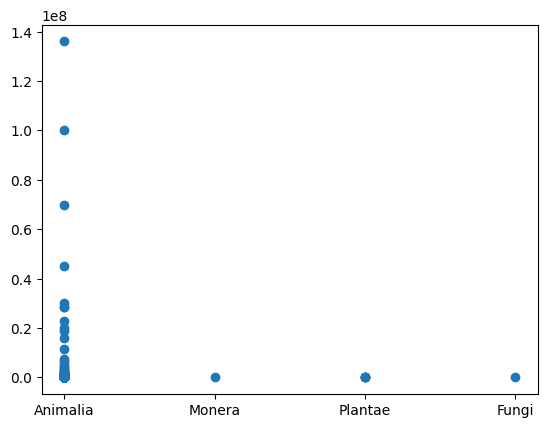

In [56]:
plt.scatter(new_df_p['Kingdom'], new_df_p['Adult weight (g)'])
